In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os
datadir = os.getcwd()
datafile = '/betaPic_mag_res.dat'

In [40]:
times, mags = np.loadtxt(datadir + datafile, usecols=(0, 1)).T

In [41]:
#binning fuction
def bins(time, flux, binsize):
    n_bins = len(time) // binsize
    indexes = np.array_split(np.arange(len(time)), n_bins)
    binned_time = np.array([np.mean(time[a]) for a in indexes])
    binned_flux = np.array([np.mean(flux[a]) for a in indexes])
    return [binned_time, binned_flux]

<Figure size 432x288 with 0 Axes>

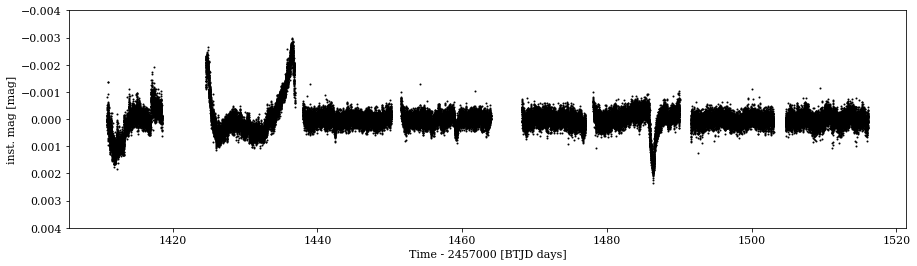

In [42]:
#plot reduced light curve from file
plt.rc('font', family='serif', size=11)
plt.tight_layout()

fig, ax = plt.subplots(1, 1, figsize=(15, 4))

ax.scatter(times, mags, c='k', s=1)

ax.set_ylim(-0.004, 0.004)
ax.invert_yaxis()

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('inst. mag [mag]')

plt.show()

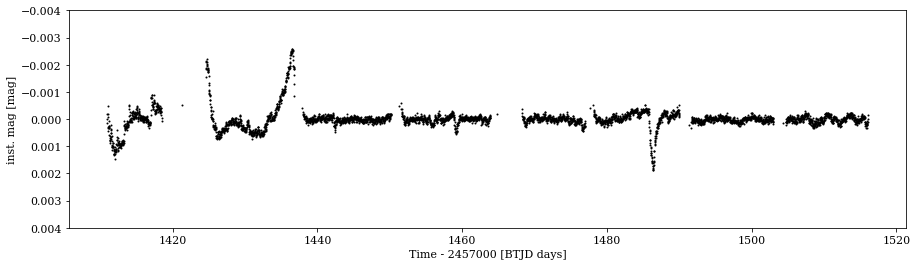

In [43]:
#plot binned (30 min) reduced light curve from file
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

#lets bin 15 points a 2 mins -> 30 min bins

times_binned = bins(times, mags, 15)[0]
mags_binned = bins(times, mags, 15)[1]

ax.scatter(times_binned, mags_binned, c='k', s=1)

ax.set_ylim(-0.004, 0.004)
ax.invert_yaxis()

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('inst. mag [mag]')

plt.show()

# Addendum: Raw light curve

In [44]:
from astropy.io import fits

#file are in the same directory
datafile4_lc = '/tess2018292075959-s0004-0000000270577175-0124-s_lc.fits'
datafile5_lc = '/tess2018319095959-s0005-0000000270577175-0125-s_lc.fits'
datafile6_lc = '/tess2018349182459-s0006-0000000270577175-0126-s_lc.fits'
datafile7_lc = '/tess2019006130736-s0007-0000000270577175-0131-s_lc.fits'

data4 = fits.getdata(datadir + datafile4_lc)
data5 = fits.getdata(datadir + datafile5_lc)
data6 = fits.getdata(datadir + datafile6_lc)
data7 = fits.getdata(datadir + datafile7_lc)

In [45]:
#mask for removing nans or measurements with quality > 0
def remove_nans_quality(time, flux, quality):
    nan_mask_time = ~np.isnan(time)
    nan_mask_flux = ~np.isnan(flux)
    zero_quality  = quality == 0
    mask_comb = nan_mask_time & nan_mask_flux & zero_quality
    return [time[mask_comb], flux[mask_comb], quality[mask_comb]]

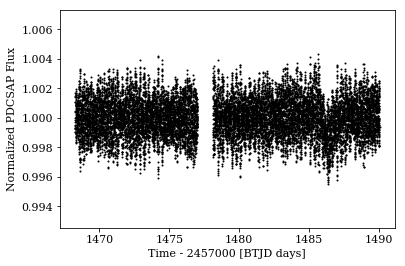

In [46]:
#PDCSAP lc sector 6: the "reduced" one..
t6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[0]
f6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[1]

#normalize to median
def div_median(flux):
    return flux / np.median(flux)

f6 = div_median(f6)

plt.xlabel('Time - 2457000 [BTJD days]')
plt.ylabel('Normalized PDCSAP Flux')

plt.scatter(t6, f6, s=1, c='k')
plt.show()

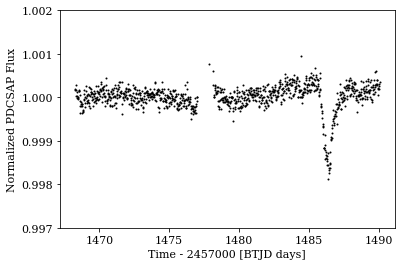

In [47]:
#SAME BUT BINNED
#PDCSAP lc sector 6: the "reduced" one..
t6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[0]
f6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[1]

#normalize to median
def div_median(flux):
    return flux / np.median(flux)


f6 = div_median(f6)

t6_binned = bins(t6, f6, 15)[0]
f6_binned = bins(t6, f6, 15)[1]

plt.xlabel('Time - 2457000 [BTJD days]')
plt.ylabel('Normalized PDCSAP Flux')

plt.ylim(0.997, 1.002)

plt.scatter(t6_binned, f6_binned, s=1, c='k')
plt.show()

# Let's look if the wiggles in sector 7 are in the SAP & PDCSAP light curve...
# & bin it again

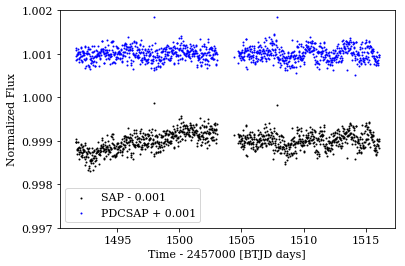

In [48]:
#sector 7
t7_PDC = remove_nans_quality(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[0]
f7_PDC = remove_nans_quality(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[1]

t7_SAP = remove_nans_quality(data7['TIME'], data7['SAP_FLUX'], data7['QUALITY'])[0]
f7_SAP = remove_nans_quality(data7['TIME'], data7['SAP_FLUX'], data7['QUALITY'])[1]

#normalize to median
def div_median(flux):
    return flux / np.median(flux)

f7_PDC = div_median(f7_PDC)
t7_PDC_binned = bins(t7_PDC, f7_PDC, 15)[0]
f7_PDC_binned = bins(t7_PDC, f7_PDC, 15)[1]

f7_SAP = div_median(f7_SAP)
t7_SAP_binned = bins(t7_SAP, f7_SAP, 15)[0]
f7_SAP_binned = bins(t7_SAP, f7_SAP, 15)[1]

plt.xlabel('Time - 2457000 [BTJD days]')
plt.ylabel('Normalized Flux')

plt.ylim(0.997, 1.002)

plt.scatter(t7_SAP_binned, f7_SAP_binned - 0.001, s=1, c='k', label='SAP - 0.001')
plt.scatter(t7_PDC_binned, f7_PDC_binned + 0.001, s=1, c='b', label='PDCSAP + 0.001')

plt.legend()

plt.show()